In [2]:
#import statements

import csv
import pandas as pd
import numpy as np
import requests
import time

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Section 1: Data Cleaning and Exploration 
### In this section, we will:
- Import the data
- Clean the data
- Combine the data
- Create and/or generalise relevant variables 
- Find relevant details about the data worth exploring

In [3]:
'''Processing the data'''

#Source: https://data.gov.sg/dataset/resale-flat-prices?resource_id=f1765b54-a209-4718-8d38-a39237f502b3
flatPrice1990=pd.read_csv('resale-flat-prices-based-on-approval-date-1990-1999.csv')
flatPrice2000=pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
flatPrice2012=pd.read_csv('resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
flatPrice2015=pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
flatPrice2017=pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

#Source: https://data.gov.sg/dataset/consumer-price-index-monthly
CPI2019Base = pd.read_csv('consumer-price-index-2019-as-base-year-monthly.csv')

desc1990 = flatPrice1990.isnull().sum()
desc2000 = flatPrice2000.isnull().sum()
desc2012 = flatPrice2012.isnull().sum()
desc2015 = flatPrice2015.isnull().sum()
desc2017 = flatPrice2017.isnull().sum()

flatInfo = pd.concat([desc1990, desc2000, desc2012, desc2015, desc2017], axis=1)
flatInfo.columns = ["1990 to 1999", "2000 to 2012", "2012 to 2014", "2015 to 2016", "2017 onwards" ]
flatInfo

,1990 to 1999,2000 to 2012,2012 to 2014,2015 to 2016,2017 onwards
month,0.0,0.0,0.0,0,0
town,0.0,0.0,0.0,0,0
flat_type,0.0,0.0,0.0,0,0
block,0.0,0.0,0.0,0,0
street_name,0.0,0.0,0.0,0,0
storey_range,0.0,0.0,0.0,0,0
floor_area_sqm,0.0,0.0,0.0,0,0
flat_model,0.0,0.0,0.0,0,0
lease_commence_date,0.0,0.0,0.0,0,0
resale_price,0.0,0.0,0.0,0,0


In [4]:
# Making the collated dataframe and verifying its datatypes
flatPriceCollated = pd.concat([flatPrice1990, flatPrice2000, flatPrice2012, flatPrice2015, flatPrice2017], join = "inner")
display(flatPriceCollated.sample(10))
flatPriceCollated.dtypes

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
180899,1998-01,WOODLANDS,5 ROOM,129,MARSILING RISE,07 TO 09,139.0,MODEL A,1985,333000.0
34707,2018-08,YISHUN,3 ROOM,206,YISHUN ST 21,01 TO 03,73.0,New Generation,1985,300000.0
290808,2009-06,JURONG WEST,4 ROOM,739,JURONG WEST ST 73,10 TO 12,106.0,Model A,1995,293000.0
115036,2003-03,QUEENSTOWN,3 ROOM,152,MEI LING ST,01 TO 03,67.0,Improved,1970,145500.0
367,2017-01,CLEMENTI,3 ROOM,364,CLEMENTI AVE 2,04 TO 06,82.0,New Generation,1978,415000.0
174158,1997-11,CHOA CHU KANG,4 ROOM,433,CHOA CHU KANG AVE 4,10 TO 12,107.0,MODEL A,1993,295000.0
152794,2004-07,ANG MO KIO,3 ROOM,120,ANG MO KIO AVE 3,01 TO 03,67.0,New Generation,1978,200000.0
14420,2012-09,TAMPINES,4 ROOM,850,TAMPINES ST 82,04 TO 06,89.0,Simplified,1986,433000.0
173104,1997-10,WOODLANDS,4 ROOM,310,WOODLANDS ST 31,04 TO 06,103.0,MODEL A,1993,305000.0
282289,2009-02,TAMPINES,4 ROOM,443,TAMPINES ST 43,04 TO 06,84.0,Simplified,1985,286000.0


month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
dtype: object

In [5]:
#Attempting to understand what "remaining_lease" refers to
display(flatPrice2015.sample(3))
display(flatPrice2017.sample(3))

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
25834,2016-06,BUKIT BATOK,4 ROOM,210,BT BATOK ST 21,07 TO 09,108.0,Model A,1985,67,455000.0
32634,2016-10,BEDOK,3 ROOM,618,BEDOK RESERVOIR RD,01 TO 03,69.0,Improved,1986,68,300000.0
14920,2015-11,ANG MO KIO,3 ROOM,457,ANG MO KIO AVE 10,01 TO 03,75.0,New Generation,1980,63,318000.0


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
65530,2020-01,SENGKANG,4 ROOM,441B,FERNVALE RD,07 TO 09,93.0,Model A,2012,91 years 01 month,420000.0
78128,2020-09,BEDOK,EXECUTIVE,105,LENGKONG TIGA,01 TO 03,149.0,Maisonette,1989,67 years 04 months,855000.0
88045,2021-01,BUKIT PANJANG,2 ROOM,488,SEGAR RD,04 TO 06,47.0,Model A,2014,93 years,240000.0


### **<u>Subsection 1.1: Generalising `remaining_lease` for the entire dataset</u>**
From the above, it seems like "remaining_lease" was a statistic which was introduced starting from the 2015-2016 csv. However, one may also compute an estimation for this variable via taking:

$$ \text{lease\_commence\_date} + 99 \text{ years} - \text{month (or pretty much, the date when the transaction was made)}$$


However, a shortcoming of this method of manual computation is the lack of precision; namely that we may only evaluate the remaining lease to the nearest year. Furthermore, it seems as if the method in which the data was stored differs between the `2015-2016` csv and the `2017 onwards` csvs, with the former storing the data to the nearest year, and the latter storing the data to the nearest month.  

These inconsistencies prove to be a problem, but oh well, what can we do about it. 

As such, noting that most of the data could only compute the `remaining_lease` to the nearest year ($\pm$ 1 year for the data before 2015), we will proceed by using the aforementioned; crude method. Sure, it does not provide a high degree of accuracy, but at least there is consistency if we apply this formula for all rows. 

In [6]:
# Adding columns representing the columns for the month and year
flatPriceCollated["month_no"] = (flatPriceCollated.month.str[5:]).astype(int)
flatPriceCollated["year_no"] = (flatPriceCollated.month.str[:4]).astype(int)

display(flatPriceCollated.sample(10))

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,month_no,year_no
77601,1994-09,JURONG EAST,EXECUTIVE,322A,JURONG EAST ST 31,07 TO 09,149.0,MAISONETTE,1985,315000.0,9,1994
161188,1997-06,HOUGANG,3 ROOM,246,HOUGANG ST 22,01 TO 03,67.0,NEW GENERATION,1984,185000.0,6,1997
239626,1999-03,BEDOK,3 ROOM,54,CHAI CHEE ST,07 TO 09,82.0,NEW GENERATION,1981,187000.0,3,1999
14111,2017-09,JURONG EAST,4 ROOM,21,TEBAN GDNS RD,34 TO 36,92.0,Model A,2013,480000.0,9,2017
71162,2020-06,CHOA CHU KANG,4 ROOM,411,CHOA CHU KANG AVE 3,07 TO 09,104.0,Model A,1992,315000.0,6,2020
43365,2001-03,WOODLANDS,5 ROOM,710,WOODLANDS DR 70,07 TO 09,119.0,Improved,1997,303000.0,3,2001
135709,1996-09,CLEMENTI,3 ROOM,375,CLEMENTI AVE 4,04 TO 06,82.0,NEW GENERATION,1980,235000.0,9,1996
244194,2007-09,SENGKANG,5 ROOM,183B,RIVERVALE CRES,04 TO 06,110.0,Improved,2003,295000.0,9,2007
77413,2020-08,TAMPINES,4 ROOM,886,TAMPINES ST 83,07 TO 09,108.0,Model A,1988,412000.0,8,2020
24899,2013-04,SEMBAWANG,5 ROOM,356A,ADMIRALTY DR,01 TO 03,111.0,Premium Apartment,2001,475000.0,4,2013


In [7]:
# This is the aforementioned calculation for the remaining lease of a house with respect to when the house was resold. We 
# first implement the creation of the column "remaining_lease_manual"
def calcYearsLeft(row):
  row.remaining_lease_manual = row.lease_commence_date + 99 - (row.year_no + row.month_no/12)
  return row

flatPriceCollated["remaining_lease_manual"] = 0
flatPriceCollated = flatPriceCollated.apply(calcYearsLeft, axis='columns')
display(flatPriceCollated.sample(10))
flatPriceCollated.describe()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,month_no,year_no,remaining_lease_manual
45342,2001-04,KALLANG/WHAMPOA,3 ROOM,20,UPP BOON KENG RD,04 TO 06,59.0,Improved,1975,139500.0,4,2001,72.666667
10514,2017-07,JURONG WEST,4 ROOM,693,JURONG WEST CTRL 1,01 TO 03,106.0,Premium Apartment,1998,435000.0,7,2017,79.416667
4248,1990-04,JURONG WEST,3 ROOM,487,JURONG WEST AVE 1,10 TO 12,73.0,MODEL A,1984,50000.0,4,1990,92.666667
78697,1994-10,BEDOK,3 ROOM,536,BEDOK NTH ST 3,10 TO 12,68.0,NEW GENERATION,1980,83000.0,10,1994,84.166667
169909,2005-02,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 03,82.0,New Generation,1984,228000.0,2,2005,77.833333
221682,2006-11,PASIR RIS,4 ROOM,748,PASIR RIS ST 71,01 TO 03,104.0,Model A,1996,243000.0,11,2006,88.083333
11373,2012-08,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,10 TO 12,31.0,Improved,1975,238000.0,8,2012,61.333333
288236,2009-05,GEYLANG,4 ROOM,348,UBI AVE 1,07 TO 09,84.0,Simplified,1986,279280.0,5,2009,75.583333
15291,2000-06,SERANGOON,5 ROOM,216,SERANGOON AVE 4,01 TO 03,121.0,Improved,1985,370000.0,6,2000,83.500000
331114,2010-08,BEDOK,3 ROOM,616,BEDOK RESERVOIR RD,10 TO 12,68.0,New Generation,1982,269000.0,8,2010,70.333333


,floor_area_sqm,lease_commence_date,resale_price,month_no,year_no,remaining_lease_manual
count,864616.000000,864616.000000,8.646160e+05,864616.000000,864616.000000,864616.000000
mean,95.678732,1987.590754,3.028835e+05,6.593214,2004.966207,81.075112
std,25.966473,9.939253,1.555762e+05,3.410459,8.467052,10.146425
min,28.000000,1966.000000,5.000000e+03,1.000000,1990.000000,43.166667
25%,73.000000,1980.000000,1.850000e+05,4.000000,1998.000000,74.500000
50%,93.000000,1986.000000,2.820000e+05,7.000000,2004.000000,82.750000
75%,113.000000,1995.000000,3.950000e+05,10.000000,2011.000000,89.333333
max,307.000000,2019.000000,1.360000e+06,12.000000,2022.000000,100.583333


In [8]:
# verifying the validity of my proposed computation

# adding month_no and year_no columns for the 2015, 2017 dataframes
flatPrice2015["month_no"] = (flatPrice2015.month.str[5:]).astype(int)
flatPrice2015["year_no"] = (flatPrice2015.month.str[:4]).astype(int)

flatPrice2017["month_no"] = (flatPrice2017.month.str[5:]).astype(int)
flatPrice2017["year_no"] = (flatPrice2017.month.str[:4]).astype(int)

# Finding the difference between our calculated value and the provided value
flatPrice2015["remaining_lease_manual"] = 0
flatPrice2015New = flatPrice2015.apply(calcYearsLeft, axis='columns')
flatPrice2015New["remaining_lease_difference"] = abs(flatPrice2015New.remaining_lease_manual - flatPrice2015New.remaining_lease)
display(flatPrice2015New.describe())

def calcYearsDiff2017(row):
  #       72 years 06 months	
  #index: 0123456789
  years = int(str(row.remaining_lease)[:2])
  months = int(str(row.remaining_lease)[9:11]) if (len(row.remaining_lease) > 12) else 0
  row.remaining_lease_difference = abs(row.remaining_lease_manual - ( years + months/12 ) )
  return row

flatPrice2017["remaining_lease_manual"] = 0
flatPrice2017New = flatPrice2017.apply(calcYearsLeft, axis='columns')
flatPrice2017New["remaining_lease_difference"] = 0
flatPrice2017New = flatPrice2017New.apply(calcYearsDiff2017, axis='columns')
display(flatPrice2017New.describe())

,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,month_no,year_no,remaining_lease_manual,remaining_lease_difference
count,37153.000000,37153.000000,37153.000000,3.715300e+04,37153.000000,37153.000000,37153.000000,37153.000000
mean,97.020386,1990.920195,73.913116,4.368628e+05,6.635480,2015.521438,73.845800,0.347312
std,24.198360,10.862330,10.885456,1.358052e+05,3.307996,0.499547,10.846620,0.235746
min,31.000000,1966.000000,48.000000,1.900000e+05,1.000000,2015.000000,48.083333,0.000000
25%,74.000000,1984.000000,66.000000,3.400000e+05,4.000000,2015.000000,66.250000,0.166667
50%,96.000000,1989.000000,72.000000,4.080000e+05,7.000000,2016.000000,71.750000,0.333333
75%,111.000000,2000.000000,83.000000,4.950000e+05,9.000000,2016.000000,82.750000,0.500000
max,280.000000,2013.000000,97.000000,1.150000e+06,12.000000,2016.000000,96.666667,1.166667


,floor_area_sqm,lease_commence_date,resale_price,month_no,year_no,remaining_lease_manual,remaining_lease_difference
count,118413.000000,118413.000000,1.184130e+05,118413.000000,118413.000000,118413.000000,1.184130e+05
mean,97.837401,1995.101568,4.606458e+05,6.736912,2019.203702,74.336457,5.653616e-01
std,24.120851,13.444761,1.592983e+05,3.407568,1.464333,13.332818,2.899117e-01
min,31.000000,1966.000000,1.400000e+05,1.000000,2017.000000,43.166667,7.105427e-14
25%,82.000000,1985.000000,3.450000e+05,4.000000,2018.000000,63.666667,3.333333e-01
50%,94.000000,1996.000000,4.300000e+05,7.000000,2019.000000,74.416667,5.833333e-01
75%,113.000000,2005.000000,5.400000e+05,10.000000,2021.000000,84.833333,8.333333e-01
max,249.000000,2019.000000,1.360000e+06,12.000000,2022.000000,97.333333,1.583333e+00


As we may see from the results, the mean of `remaining_lease_difference` hovers around 0.3 to 0.6, which is expected. This shows that our method of computing the `remaining_lease` has a very low deviation from the ones provided in the government dataset. As such, this variable is valid to use in our analysis of the dataset. 

### **<u>Subsection 1.2: Creating a variable `resale_price_adjusted` to adjust for inflation</u>**

One notes that due to the substantial inflation which occured in the last 30 years, data regarding the resale price is likely inaccurate due to the lack of adjustment for inflation. As such, we will make a column `resale_price_adjusted` which adjusts the `resale_price` to the equivalent price today. 
To do this, we will refer to the `CPI2019Base` dataframe. 

In [9]:
display(CPI2019Base)


,month,level_1,value
0,1961-01,All Items,24.542
1,1961-01,All Items Less Imputed Rentals On Owner-occupi...,na
2,1961-01,All Items Less Accommodation,na
3,1961-02,All Items,24.565
4,1961-02,All Items Less Imputed Rentals On Owner-occupi...,na
...,...,...,...
2188,2021-10,All Items Less Imputed Rentals On Owner-occupi...,102.927
2189,2021-10,All Items Less Accommodation,103.31
2190,2021-11,All Items,103.959
2191,2021-11,All Items Less Imputed Rentals On Owner-occupi...,104.079


The `CPI`, or Consumer Price Index, "is a measure that examines the weighted average of prices of a basket of consumer goods and services, such as transportation, food, and medical care." (Source: Investopedia). Notably, the `value` column in the dataframe may be caluclated as follows: 

$$
\frac{\text{Total Cost of All Products in an arbituary year}}{\text{Total Cost of All Products in 2019}}
$$

For the sake of getting using a metric which represents the overall inflation of Singapore, we choose to use `level_1 = "All Items"`



In [10]:
mask = CPI2019Base.level_1.str.endswith("All Items") == True

CPI2019AllItems = CPI2019Base[mask]
CPI2019AllItems["month_no"] = (CPI2019AllItems.month.str[5:]).astype(int)
CPI2019AllItems["year_no"] = (CPI2019AllItems.month.str[:4]).astype(int)
CPI2019AllItems = CPI2019AllItems.reset_index()

CPI2019AllItems.isnull().sum()

<ipython-input-10-78de8ab51b8d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPI2019AllItems["month_no"] = (CPI2019AllItems.month.str[5:]).astype(int)
<ipython-input-10-78de8ab51b8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CPI2019AllItems["year_no"] = (CPI2019AllItems.month.str[:4]).astype(int)


index       0
month       0
level_1     0
value       0
month_no    0
year_no     0
dtype: int64

Perhaps out of coincidence, when `level_1 = "All Items"`, the CPI metric exists for all months. Coincidence? Maybe. But Ill take it. Lets make a column `multiplier` which stores a metric representing how much we need to scale up the `resale_price` to accomodate for inflation in respect to today. 

In [11]:

currCPI = CPI2019AllItems.value.iloc[-1]

CPI2019AllItems.value = CPI2019AllItems.value.astype("float")

CPI2019AllItems["multiplier"] = float(currCPI) / CPI2019AllItems.value

CPI2019AllItems


,index,month,level_1,value,month_no,year_no,multiplier
0,0,1961-01,All Items,24.542,1,1961,4.235963
1,3,1961-02,All Items,24.565,2,1961,4.231997
2,6,1961-03,All Items,24.585,3,1961,4.228554
3,9,1961-04,All Items,24.187,4,1961,4.298135
4,12,1961-05,All Items,24.053,5,1961,4.322080
...,...,...,...,...,...,...,...
726,2178,2021-07,All Items,101.672,7,2021,1.022494
727,2181,2021-08,All Items,102.231,8,2021,1.016903
728,2184,2021-09,All Items,102.657,9,2021,1.012683
729,2187,2021-10,All Items,102.950,10,2021,1.009801


In [12]:
CPI2019AllItems = CPI2019AllItems[["month","multiplier"]]
flatPriceCollated = pd.merge(flatPriceCollated,CPI2019AllItems,on="month", how="outer")
flatPriceCollated.dropna(inplace= True)
flatPriceCollated["resale_price_adjusted"] = flatPriceCollated.resale_price * flatPriceCollated.multiplier
flatPriceCollated

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,month_no,year_no,remaining_lease_manual,multiplier,resale_price_adjusted
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,9000.0,1.0,1990.0,85.916667,1.677678,15099.102734
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977.0,6000.0,1.0,1990.0,85.916667,1.677678,10066.068489
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,8000.0,1.0,1990.0,85.916667,1.677678,13421.424652
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977.0,6000.0,1.0,1990.0,85.916667,1.677678,10066.068489
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976.0,47200.0,1.0,1990.0,84.916667,1.677678,79186.405448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860467,2021-11,YISHUN,EXECUTIVE,792,YISHUN RING RD,10 TO 12,144.0,Apartment,1987.0,690000.0,11.0,2021.0,64.083333,1.000000,690000.000000
860468,2021-11,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,Apartment,1987.0,680000.0,11.0,2021.0,64.083333,1.000000,680000.000000
860469,2021-11,YISHUN,EXECUTIVE,614,YISHUN ST 61,01 TO 03,142.0,Apartment,1987.0,632000.0,11.0,2021.0,64.083333,1.000000,632000.000000
860470,2021-11,YISHUN,EXECUTIVE,837,YISHUN ST 81,01 TO 03,145.0,Maisonette,1988.0,755000.0,11.0,2021.0,65.083333,1.000000,755000.000000


### **<u>Subsection 1.3: Converting the Locations of the HDB blocks into coordinates</u>**

In this assignment, we also plan to explore the data based on its geographical attributes (ie. latitude and longitude). As such, we need to retrieve the approximate coordinates of each HDB block based on their address by making use of OneMapAPI.

Some blocks of code require the hour-long API request to be done. As such, we have commented them out and wrote the coordinates of all the addresses into a CSV file beforehand.

In [13]:
'''
# Making a list of all the distinct addresses 
flatLocation = flatPriceCollated.copy()[['block', 'street_name']]
flatLocation['adr'] = flatLocation['block'] + ' ' + flatLocation['street_name']

flatLocation = pd.DataFrame(flatLocation.adr.unique(), columns = ["adr"])
'''

'\n# Making a list of all the distinct addresses \nflatLocation = flatPriceCollated.copy()[[\'block\', \'street_name\']]\nflatLocation[\'adr\'] = flatLocation[\'block\'] + \' \' + flatLocation[\'street_name\']\n\nflatLocation = pd.DataFrame(flatLocation.adr.unique(), columns = ["adr"])\n'

In [14]:
# Retrieving the latitude and longitude of said adsreses
'''
// Dont actually run this cell. Its pulling 9000 requests to an API, which takes about 1 hour to finish. We saved the data into a csv later. 


import requests

def getcoordinates(address):
    req = requests.get('https://developers.onemap.sg/commonapi/search?searchVal='+address+'&returnGeom=Y&getAddrDetails=Y&pageNum=1')
    resultsdict = eval(req.text)
    if len(resultsdict['results'])>0:
        return resultsdict['results'][0]['LATITUDE'], resultsdict['results'][0]['LONGITUDE']
    else:
        pass

latitudes, longitudes = [], []
for i in range(flatLocation.index.size):
    address = flatLocation.adr[i]
    latitude, longitude = None, None
    try:
        if len(getcoordinates(address))>0:
            latitude, longitude = getcoordinates(address)
    except:
        # IF the coordinates cant be found, it could be because the NDB flat does not exist.
        # For these cases, we remove the block number and feed it back to the API
        address = address[address.find(' ')+1:]
        if getcoordinates(address) != None and len(getcoordinates(address))>0:
            latitude, longitude = getcoordinates(address)
    
    latitudes.append(latitude)
    longitudes.append(longitude)

flatLocation['Latitude'], flatLocation['Longitude'] = pd.Series(latitudes), pd.Series(longitudes)
flatLocation

'''

"\n// Dont actually run this cell. Its pulling 9000 requests to an API, which takes about 1 hour to finish. We saved the data into a csv later. \n\n\nimport requests\n\ndef getcoordinates(address):\n    req = requests.get('https://developers.onemap.sg/commonapi/search?searchVal='+address+'&returnGeom=Y&getAddrDetails=Y&pageNum=1')\n    resultsdict = eval(req.text)\n    if len(resultsdict['results'])>0:\n        return resultsdict['results'][0]['LATITUDE'], resultsdict['results'][0]['LONGITUDE']\n    else:\n        pass\n\nlatitudes, longitudes = [], []\nfor i in range(flatLocation.index.size):\n    address = flatLocation.adr[i]\n    latitude, longitude = None, None\n    try:\n        if len(getcoordinates(address))>0:\n            latitude, longitude = getcoordinates(address)\n    except:\n        # IF the coordinates cant be found, it could be because the NDB flat does not exist.\n        # For these cases, we remove the block number and feed it back to the API\n        address = addr

For the most part, we notice that all the cells have a valid Latitude and Longitude. However, for a small set of the data, these data could not be fetched from the API. For these cases, we instead opt to fetch the data manually, and hardcode the data in. 

In [15]:
'''
#flatLocTest = flatLocation[flatLocation.Latitude.isnull()]
flatLocNull = flatLocation[flatLocation.Latitude.isnull()]
flatLocNull = flatLocNull.reset_index()
flatLocNull["town"] = ""
for i in range(flatLocNull.index.size):
  flatLocNull.town[i] = flatLocNull.adr[i][flatLocNull.adr[i].find(' ')+1: ]

display(flatLocNull)
flatLocNull.town.unique()
'''

'\n#flatLocTest = flatLocation[flatLocation.Latitude.isnull()]\nflatLocNull = flatLocation[flatLocation.Latitude.isnull()]\nflatLocNull = flatLocNull.reset_index()\nflatLocNull["town"] = ""\nfor i in range(flatLocNull.index.size):\n  flatLocNull.town[i] = flatLocNull.adr[i][flatLocNull.adr[i].find(\' \')+1: ]\n\ndisplay(flatLocNull)\nflatLocNull.town.unique()\n'

In [16]:
'''
for i in range(flatLocNull.index.size):
  index = flatLocNull["index"][i]
  townLocationDictionary = {
    'KG BAHRU HILL': (1.2766,103.83),                       # fetched from https://zip.nowmsg.com/sg_postal_code.asp?CityName=160018
    'JLN PASAR BARU': (1.31724,103.898245),                 # fetched from https://www.findlatitudeandlongitude.com/l/?=loc=Lake+Minnewanka+Scenic+Dr%2C+Banff+National+Park%2C+Improvement+District+No.+9%2C+AB+T0L%2C+Canada&id=557437
    'ST. GEORGE\'S RD': (1.3242,103.8628),                  # fetched from https://www.distancesfrom.com/18-St-Georges-Road-Singapore-latitude-longitude-18-St-Georges-Road-Singapore-latitude-18-St-Georges-/LatLongHistory/2649743.aspx 
    'NILE RD': (1.378006,103.888188),                       # fetched from https://www.srx.com.sg/hdb/bukit-merah/nile-road-hsnil0001 and https://www.findlatitudeandlongitude.com/l/Blk+570+hougang+street+51+singapore/4651087/
    'JLN MEMBINA BARAT': (1.28451334165584,103.82771154802), # fetched from https://datumsg.com/postal_codes/169483
    'BUANGKOK STH FARMWAY 1': (1.379946,103.887516)         # fetched from https://www.findlatitudeandlongitude.com/l/5+BUANGKOK+GREEN%2C+Singapore+539748/2689757/
  }

  flatLocation.Latitude[index]	= townLocationDictionary[flatLocNull["town"][i]][0]
  flatLocation.Longitude[index] = townLocationDictionary[flatLocNull["town"][i]][1]
'''

'\nfor i in range(flatLocNull.index.size):\n  index = flatLocNull["index"][i]\n  townLocationDictionary = {\n    \'KG BAHRU HILL\': (1.2766,103.83),                       # fetched from https://zip.nowmsg.com/sg_postal_code.asp?CityName=160018\n    \'JLN PASAR BARU\': (1.31724,103.898245),                 # fetched from https://www.findlatitudeandlongitude.com/l/?=loc=Lake+Minnewanka+Scenic+Dr%2C+Banff+National+Park%2C+Improvement+District+No.+9%2C+AB+T0L%2C+Canada&id=557437\n    \'ST. GEORGE\'S RD\': (1.3242,103.8628),                  # fetched from https://www.distancesfrom.com/18-St-Georges-Road-Singapore-latitude-longitude-18-St-Georges-Road-Singapore-latitude-18-St-Georges-/LatLongHistory/2649743.aspx \n    \'NILE RD\': (1.378006,103.888188),                       # fetched from https://www.srx.com.sg/hdb/bukit-merah/nile-road-hsnil0001 and https://www.findlatitudeandlongitude.com/l/Blk+570+hougang+street+51+singapore/4651087/\n    \'JLN MEMBINA BARAT\': (1.28451334165584,103.827

In [17]:
'''
This was our code to write the DataFrame into a CSV file.

print(flatLocation.isnull().sum())
flatLocation.to_csv('flatLocation.csv')
flatLocation.sample(10)
'''
flatLocation = pd.read_csv('flatLocation.csv')[['adr','Latitude','Longitude']]
flatLocation.head()

,adr,Latitude,Longitude
0,309 ANG MO KIO AVE 1,1.364362,103.846005
1,216 ANG MO KIO AVE 1,1.366197,103.841505
2,211 ANG MO KIO AVE 3,1.369197,103.841667
3,202 ANG MO KIO AVE 3,1.368446,103.844516
4,235 ANG MO KIO AVE 3,1.366824,103.836491


In [18]:
flatPriceCollated['address'] = flatPriceCollated['block'] + ' ' + flatPriceCollated['street_name']


flatLocation = flatLocation.rename({"adr": "address"}, axis = 1)

flatPriceCollated = pd.merge(flatPriceCollated,flatLocation,on="address", how="outer")
flatPriceCollated.dropna(inplace= True)
flatPriceCollated

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,month_no,year_no,remaining_lease_manual,multiplier,resale_price_adjusted,address,Latitude,Longitude
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,9000.0,1.0,1990.0,85.916667,1.677678,15099.102734,309 ANG MO KIO AVE 1,1.364362,103.846005
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977.0,6000.0,1.0,1990.0,85.916667,1.677678,10066.068489,309 ANG MO KIO AVE 1,1.364362,103.846005
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977.0,8000.0,1.0,1990.0,85.916667,1.677678,13421.424652,309 ANG MO KIO AVE 1,1.364362,103.846005
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977.0,6000.0,1.0,1990.0,85.916667,1.677678,10066.068489,309 ANG MO KIO AVE 1,1.364362,103.846005
4,1990-02,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977.0,8000.0,2.0,1990.0,85.833333,1.674408,13395.267930,309 ANG MO KIO AVE 1,1.364362,103.846005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860467,2021-11,SENGKANG,5 ROOM,287B,COMPASSVALE CRES,04 TO 06,113.0,Premium Apartment,2017.0,643000.0,11.0,2021.0,94.083333,1.000000,643000.000000,287B COMPASSVALE CRES,1.398804,103.896077
860468,2021-11,SENGKANG,5 ROOM,287B,COMPASSVALE CRES,13 TO 15,113.0,Premium Apartment,2017.0,690000.0,11.0,2021.0,94.083333,1.000000,690000.000000,287B COMPASSVALE CRES,1.398804,103.896077
860469,2021-11,YISHUN,4 ROOM,508B,YISHUN AVE 4,04 TO 06,93.0,Model A,2018.0,490000.0,11.0,2021.0,95.083333,1.000000,490000.000000,508B YISHUN AVE 4,1.414291,103.839840
860470,2021-11,YISHUN,4 ROOM,502A,YISHUN ST 51,10 TO 12,92.0,Model A,2018.0,540000.0,11.0,2021.0,95.083333,1.000000,540000.000000,502A YISHUN ST 51,1.416393,103.841369


### **<u>Subsection 1.4: The actual data exploration</u>**

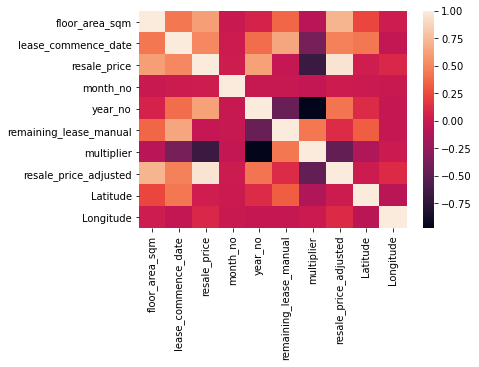

In [19]:
heat_map = sns.heatmap(flatPriceCollated.corr())
plt.show()

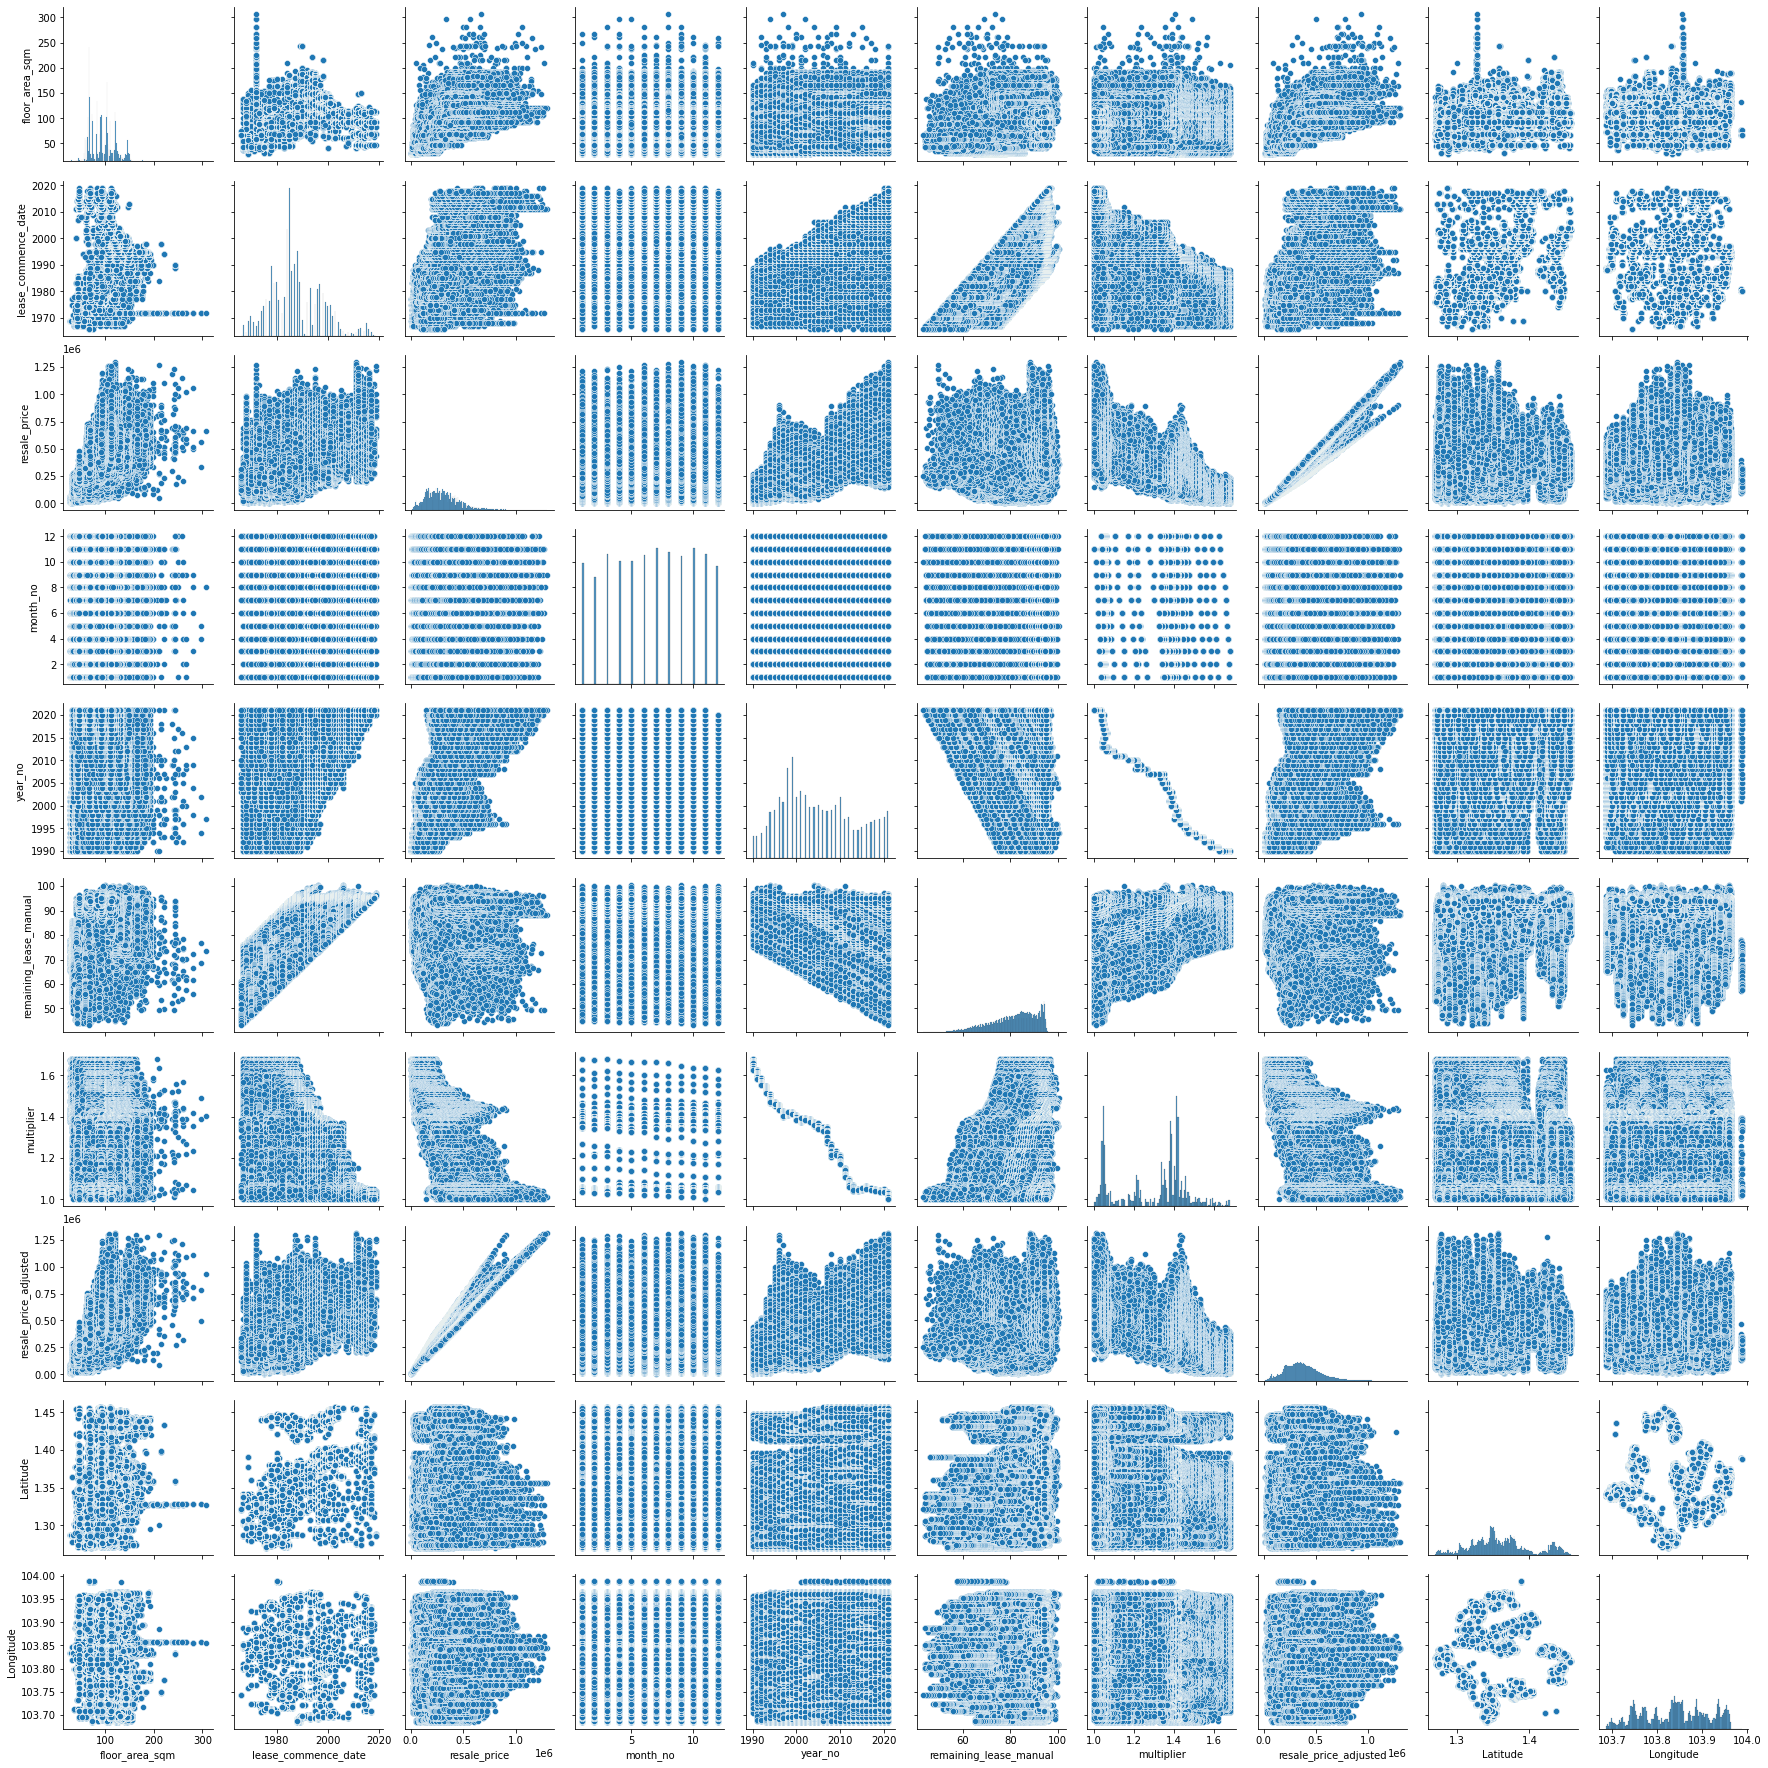

In [20]:
sns.pairplot(flatPriceCollated)